# Comparison of different AutoEncoder models (simple or complex)

We make use of our built pipeline inside the **automate.py** file. This helps greatly for readability and usage.

In [1]:
# Import necessary modules
from automate import *

2023-06-10 15:33:17.998045: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# Load data files
with (open("df_comparison.pkl", "rb")) as openfile:
    df = pickle.load(openfile)

with (open("data.pkl", "rb")) as openfile:
    data = pickle.load(openfile)

data["v_gene_one_hot"]  = data["v_gene_one_hot"].apply(lambda x: x.reshape(54))
data["j_gene_one_hot"]  = data["j_gene_one_hot"].apply(lambda x: x.reshape(13))
data['CDR3_al_one_hot'] = df['CDR3_al_integer']
data = [np.stack(col.values) for _, col in data.items()]
X_train = data

In [10]:
# Setting the parameters for the architecture of the complex AE model
params = {
            "latent_dim": 20,
            "dense_nodes": 75,
            "aa_embedding_dim": 21,
            "v_gene_embedding_dim": 54,
            "j_gene_embedding_dim": 13,
            "beta": 0.2,
            "max_cdr3_len": 20,
            "n_aas": 21,
            "n_v_genes": 54,
            "n_j_genes": 13,
            "stopping_monitor": "val_loss",
            "batch_size": 100,
            "pretrains": 2,
            "warmup_period": 3,
            "epochs": 10,
            "patience": 20,
            "n_inputs" : 20,
            "v_inputs" : 54,
            "j_inputs" : 13
        }

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 cdr3_input (InputLayer)        [(None, 20)]         0           []                               
                                                                                                  
 dense_12 (Dense)               (None, 40)           840         ['cdr3_input[0][0]']             
                                                                                                  
 batch_normalization_8 (BatchNo  (None, 40)          160         ['dense_12[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 v_gene_input (InputLayer)      [(None, 54)]         0           []                         

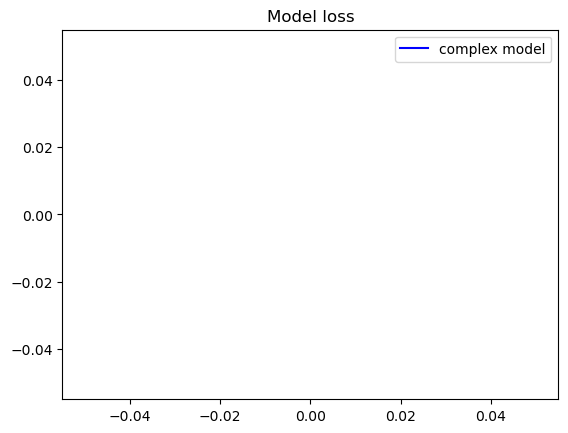

In [13]:
# Building and training the deep AE
model, encoder, decoder = train_model_complex(df, X_train, params=params)

  0%|          | 0/236345 [00:00<?, ?it/s]

10/10 [==============================] - 0s 860us/step
300
(300, 20)


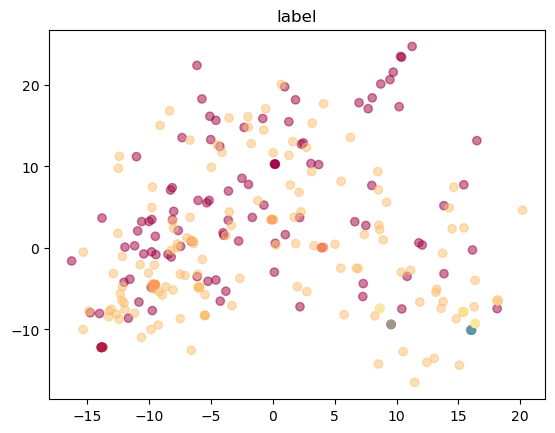

Accuracy:  0.5466666666666666


/opt/anaconda3/envs/m4r/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yanis/Documents/Imperial Y4/M4R-Project-Notebooks/automate.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample[str(label+"_kmeans_label")] = kmeans.labels_


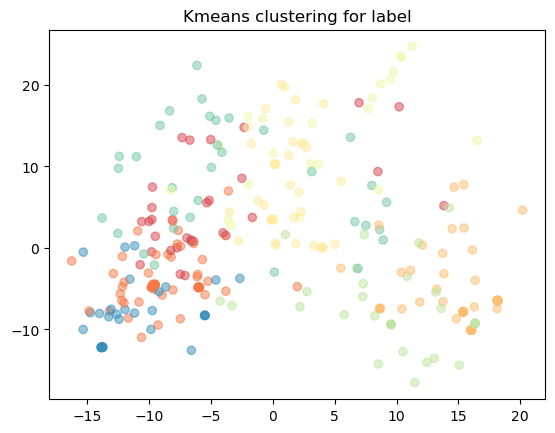

In [14]:
# Plotting the results obtained from the deep AE
N = 300
X_test = X_train[:N]
model_results(df, X_test, encoder, label="label")

In [15]:
# Setting the parameters for the architecture of the simple AE model
params = {  "n_inputs" : 20,
            "epochs": 4,
            "batch_size": 32,}
# Building and training the simple/basic AE
model, encoder = train_model_basic(df, X_train, params=params)

Epoch 1/4
4825/7386 [==================>...........] - ETA: 2s - loss: 14.7502

KeyboardInterrupt: 

  0%|          | 0/236345 [00:00<?, ?it/s]

300
(300, 2)


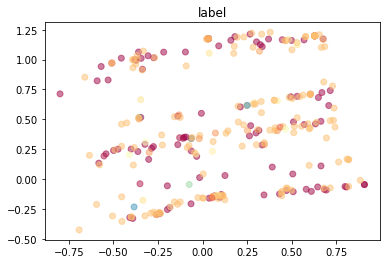

c:\Users\yanis\OneDrive\PC HP SPECTRE 2019\Documents\M4R Project\automate.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample[str(label+"_kmeans_label")] = kmeans.labels_
C:\Users\yanis\AppData\Roaming\Python\Python38\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Accuracy:  0.51


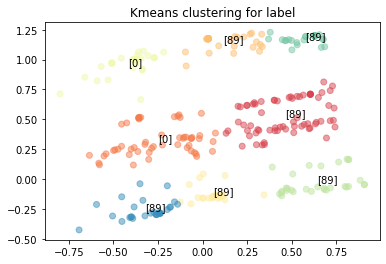

In [ ]:
# Plotting the results obtained from the simple AE
model_results(df, X_test, encoder, label="label", mode_complex=False)